In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal as mvn

In [15]:
np.random.seed(123)

# create data set
n = 1000
k = 4
_mus = np.array([[10,-14], [-20,-17], [23,1], [-13,12]])
_sigmas = np.array([[[3, 0], [0, 0.5]], [[2, 0], [0, 1.5]], [[1.2, 0],[0, 1.7]], [[1,0],[0,2]]])
_pis = np.array([0.2, 0.3, 0.2, 0.3])
xs = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])
print(xs.shape)
# initial guesses for parameters
pis = np.random.random(k)
pis /= pis.sum()
mus = np.random.random((k,2))
sigmas = np.array([np.eye(2)] * k)
# print(pis, mus, sigmas)

(1000, 2)


In [16]:
%%time
gmm = GaussianMixture(n_components = 4)
gmm.fit(xs)

Wall time: 0 ns


In [17]:
mus1 = gmm.means_
sigmas1 = gmm.covariances_
print(mus1)
print(sigmas1)

[[-12.91172082  11.89227768]
 [ 22.91629585   1.13063819]
 [-20.0891947  -16.99399097]
 [  9.9812725  -14.07054282]]
[[[0.92826588 0.02017564]
  [0.02017564 1.99088241]]

 [[0.99282444 0.00665384]
  [0.00665384 1.42813975]]

 [[2.10155229 0.03118426]
  [0.03118426 1.45573394]]

 [[2.93086966 0.01506207]
  [0.01506207 0.49539104]]]


In [18]:
clusters = [[] for i in range(k)]
for i in range(n):
    maxlikelihood = 0
    label = 0
    for j in range(k):
        likelihood = mvn(mus1[j], sigmas1[j]).pdf(xs[i])
        if likelihood > maxlikelihood:
            maxlikelihood = likelihood
            label = j
    clusters[label].append(xs[i])
sct = []
for i in range(len(clusters)):
    sct.append(np.array(clusters[i]))

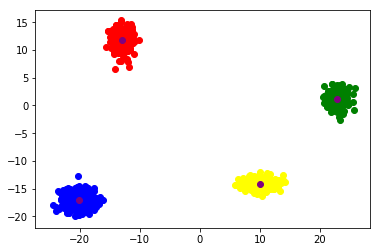

In [19]:
plt.scatter(sct[0][:, 0], sct[0][:, 1], c = 'red')
plt.scatter(sct[1][:, 0], sct[1][:, 1], c = 'green')
plt.scatter(sct[2][:, 0], sct[2][:, 1], c = 'blue')
plt.scatter(sct[3][:, 0], sct[3][:, 1], c = 'yellow')
plt.scatter(mus1[:, 0], mus1[:, 1], c = 'purple')
plt.show()

In [ ]:
np.random.seed(123)

# create data set
n = 1000
k = 4
_mus = np.array([[10,-14], [-20,-17], [23,1], [-13,12]])
_sigmas = np.array([[[3, 0], [0, 0.5]], [[2, 0], [0, 1.5]], [[1.2, 0],[0, 1.7]], [[1,0],[0,2]]])
_pis = np.array([0.2, 0.3, 0.2, 0.3])
xs = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])
print(xs.shape)
# initial guesses for parameters
pis = np.random.random(k)
pis /= pis.sum()
mus = np.random.random((k,2))
sigmas = np.array([np.eye(2)] * k)
# print(pis, mus, sigmas)

%%time
pis1, mus1, sigmas1 = em_gmm_orig(xs, pis, mus, sigmas)
# print(ll1)
print(pis)
print(mus1)
# print(sigmas)


clusters = [[] for i in range(k)]
for i in range(n):
    maxlikelihood = 0
    label = 0
    for j in range(k):
        likelihood = mvn(mus1[j], sigmas1[j]).pdf(xs[i])
        if likelihood > maxlikelihood:
            maxlikelihood = likelihood
            label = j
    clusters[label].append(xs[i])
sct = []
for i in range(len(clusters)):
    sct.append(np.array(clusters[i]))

plt.scatter(sct[0][:, 0], sct[0][:, 1], c = 'red')
plt.scatter(sct[1][:, 0], sct[1][:, 1], c = 'green')
plt.scatter(sct[2][:, 0], sct[2][:, 1], c = 'blue')
plt.scatter(sct[3][:, 0], sct[3][:, 1], c = 'yellow')
plt.scatter(mus1[:, 0], mus1[:, 1], c = 'purple')
plt.show()